# Kmeans Clustering QUIZ

### 퀴즈 
- 12:05~13:05 (1시간)
- 접근 가능한 곳
  - https://scikit-learn.org
  - https://docs.scipy.org/doc/numpy/reference/
- 100점만점 (가산점 20점)
  - 가산점은 앞으로 진행될 퀴즈에서 감점 사항을 보상받는 구조

### 퀴즈의 목적
- Kmeans_Lloyd 와 Kmeans++ 결과를 통해 Kmeans 초기화의 중요성을 확인한다.

### 사용데이터
- sklearn digits 데이터 셋 (K=10)

### 구현 함수
- Kmeans_Lloyd (40점)
  - Random 초기화를 이용하여 kmeans를 구현한다.
  - 도저히 직접 구현하기 힘들어 라이브러리 이용시 5점 인정 
- Kmeans_Plus (20점)
  - Kmeans++ 방법으로 초기화한다.
  - sklearn의 kmeans를 wrapping 해도 좋다.
  - 라이브러리 이용 없이 직접구현시 가산점 있음 (20점)

### 실험 결과
- 두 알고리즘의 Center(K=10) 를 시각화한다.(10점)
- 두 알고리즘의 Accuracy를 측정한다.(10점)
- 두 알고리즘의 Confusion Matrix 를 보여준다.(10점)
- 실험의 결론을 도출하여 간략히 작성 & Accuracy가 상식적인 범위 내(70%이상)로 출력 (10점)

### 제출
- 파일 => .ipynb 다운로드 => 이메일 보내기
- ykchoi@sejong.ac.kr


In [0]:
### ===============================================
### 추가적으로 필요한 패키지는 이쪽에 정의하세요
### ===============================================
import sklearn
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

## 데이터 로더

In [2]:
# 수정 필요 없음, 그러나 필요시 수정 가능

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target


digits.data.shape

(1797, 64)

## Kmeans 알고리즘 작성
- Kmeans_Lloyd (40점)
- Kmeans_Plus (20점)

In [0]:
def kmeans_Lloyd(X, n_clusters, rseed=2):
  
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
      labels=pairwise_distances_argmin(X,centers)
      
      new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
      
      if np.all(centers== new_centers):
        break
      centers=new_centers
    
    return centers, labels
    
def kmeans_plus(X,n_cluster):
    
    kmeans=KMeans(n_clusters=n_cluster,init='k-means++',random_state=0).fit(X)
    label=kmeans.labels_
    centers=kmeans.cluster_centers_
    
    return centers, labels

    
    
# 알고리즘이 정상적으로 작성되었다면 수정할 필요 없음
predict_centers_Lloyd, predict_labels_Lloyd = kmeans_Lloyd(X, 10)
predict_centers_Plus, predict_labels_Plus = kmeans_plus(X, 10)

In [21]:
predict_centers_Lloyd.shape



(10, 64)

## Center(K=10) 를 시각화한다.(10점)
- 두 알고리즘 모두

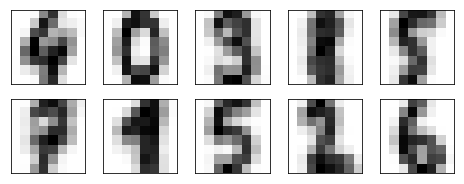

In [22]:
### ??? 를 작성한다.

predict_centers_ = predict_centers_Lloyd.reshape(10,8,8)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for axi, center in zip(ax.flat, predict_centers_):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

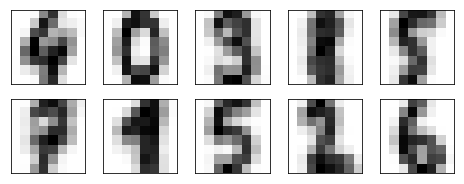

In [23]:
predict_centers=predict_centers_Plus.reshape(10,8,8)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for axi, center in zip(ax.flat, predict_centers_):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Accuracy를 측정한다.(10점)
- 두 알고리즘 모두

In [19]:
## ========================================================================
## kmeans 군집 결과는 실제 레이블에 매칭되지 않는다.
## 학습 된 각 클러스터 레이블을 실제 레이블과 일치시키는 과정이 필요하다.
## ========================================================================

labels=predict_labels_Lloyd

## 아래의 코드는 수정할 필요가 없다
from sklearn.metrics import accuracy_score
accuracy_score(Y,labels)

0.014468558708959377

## Confusion Matrix 를 보여준다.(10점)
- 두 알고리즘 모두

In [7]:
labels=predict_labels_Lloyd
confusion_matrix(Y,labels)

array([[  1, 177,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   1,   0,  55,   0,  25,   2],
       [  0,   1,  12,   8,   0,   3,   2,   0, 151,   0],
       [  0,   0, 163,   7,   3,   6,   0,   3,   1,   0],
       [166,   0,   0,   2,   2,   8,   3,   0,   0,   0],
       [  1,   0,   5,   0,  72,   0,   0, 103,   0,   1],
       [  0,   1,   0,   3,   0,   0,   0,   0,   0, 177],
       [  0,   0,   0,   2,   0, 177,   0,   0,   0,   0],
       [  0,   1,  48,  94,  11,   7,   6,   1,   4,   2],
       [  0,   0, 144,   1,   6,   8,  20,   1,   0,   0]])

In [18]:
labels=predict_labels_Plus
confusion_matrix(Y,labels)

array([[  1, 177,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   1,   0,  55,   0,  25,   2],
       [  0,   1,  12,   8,   0,   3,   2,   0, 151,   0],
       [  0,   0, 163,   7,   3,   6,   0,   3,   1,   0],
       [166,   0,   0,   2,   2,   8,   3,   0,   0,   0],
       [  1,   0,   5,   0,  72,   0,   0, 103,   0,   1],
       [  0,   1,   0,   3,   0,   0,   0,   0,   0, 177],
       [  0,   0,   0,   2,   0, 177,   0,   0,   0,   0],
       [  0,   1,  48,  94,  11,   7,   6,   1,   4,   2],
       [  0,   0, 144,   1,   6,   8,  20,   1,   0,   0]])

kmeans_Lloyd 알고리즘과 kmeans_Plus 알고리즘의
각 digit이 0부터 9까지의 label에 클러스터링 되어 이미지로 나타났습니다. 
